In [ ]:

-- Hierarchical SQL refers to the use of SQL queries and expressions to work with hierarchical or tree-like data 
-- structures within a relational database. Hierarchical data structures are common in scenarios where items or 
-- entities are organized in a parent-child relationship, forming a hierarchy or tree.

-- The typical representation of hierarchical data in a relational database involves having a table with columns 
-- that represent relationships between parent and child entities. Commonly, each row in the table represents a 
-- node in the hierarchy, and there's a column that points to the parent node.


In [2]:

-- Create a temporary table for testing
CREATE TABLE Employee (
    EmployeeID INT PRIMARY KEY,
    ManagerID INT,
    LoginID NVARCHAR(50),
    JobTitle NVARCHAR(100)
);

-- Insert sample data
INSERT INTO Employee (EmployeeID, ManagerID, LoginID, JobTitle)
VALUES
    (1, NULL, 'john_doe', 'CEO'),
    (2, 1, 'jane_smith', 'CTO'),
    (3, 1, 'bob_jones', 'CFO'),
    (4, 2, 'alice_white', 'Software Engineer'),
    (5, 2, 'charlie_brown', 'Software Engineer'),
    (6, 3, 'david_green', 'Accountant'),
    (7, 3, 'emily_black', 'Accountant');

-- Recursive CTE for hierarchical analysis
WITH EmployeeCTE AS (
    SELECT
        EmployeeID,
        ManagerID,
        LoginID,
        JobTitle,
        CAST(LoginID + ' - ' + JobTitle AS NVARCHAR(MAX)) AS EmployeePath
    FROM
        Employee
    WHERE
        ManagerID IS NULL
    
    UNION ALL
    
    SELECT
        e.EmployeeID,
        e.ManagerID,
        e.LoginID,
        e.JobTitle,
        CAST(cte.EmployeePath + ' > ' + e.LoginID + ' - ' + e.JobTitle AS NVARCHAR(MAX)) AS EmployeePath
    FROM
        Employee e
    JOIN
        EmployeeCTE cte ON e.ManagerID = cte.EmployeeID
)

-- Query to select hierarchical data
SELECT
    EmployeeID,
    ManagerID,
    LoginID,
    JobTitle,
    EmployeePath
FROM
    EmployeeCTE
ORDER BY
    EmployeePath


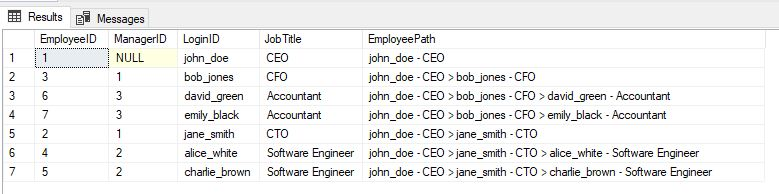

In [1]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image1.JPG")


In [ ]:

-- The "gaps and islands" problem is a common challenge encountered in data analysis, especially when dealing 
-- with sequential or time-series data. The problem involves identifying and categorizing consecutive ranges or 
-- groups of data points based on specific conditions.

-- Value = 1: It could represent an event occurring, a positive condition, or any state you want to track...islands...
-- Value = 0: It could represent the absence of an event, a negative condition, or a different state...gaps....
        

In [ ]:

CREATE TABLE SampleData (
    ID INT PRIMARY KEY,
    DateValue DATE,
    Value INT
);

INSERT INTO SampleData (ID, DateValue, Value)
VALUES
    (1, '2023-01-01', 1),
    (2, '2023-01-02', 1),
    (3, '2023-01-03', 0),
    (4, '2023-01-04', 1),
    (5, '2023-01-05', 1),
    (6, '2023-01-06', 0),
    (7, '2023-01-07', 0),
    (8, '2023-01-08', 1),
    (9, '2023-01-09', 1),
    (10, '2023-01-10', 1)


WITH GapsAndIslands AS (
    SELECT
        ID,
        DateValue,
        Value,
        ROW_NUMBER() OVER (ORDER BY DateValue) -
        ROW_NUMBER() OVER (PARTITION BY Value ORDER BY DateValue) AS GroupNum
    FROM
        SampleData
)
SELECT
    MIN(ID) AS StartID,
    MAX(ID) AS EndID,
    MIN(DateValue) AS StartDate,
    MAX(DateValue) AS EndDate,
    Value
FROM
    GapsAndIslands
GROUP BY
    Value, GroupNum
ORDER BY
    MIN(ID)


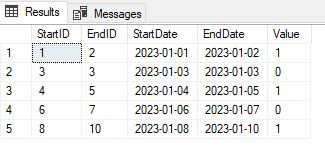

In [4]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image2.JPG")


In [ ]:

-- Here is a standard scenario where ata is stacked vertically, with lots of rows and very few columns....

CREATE TABLE SalesData (
    ProductName NVARCHAR(50),
    Month NVARCHAR(10),
    SalesAmount DECIMAL(10, 2)
);

INSERT INTO SalesData (ProductName, Month, SalesAmount)
VALUES
    ('ProductA', 'Jan', 1000),
    ('ProductA', 'Feb', 1200),
    ('ProductA', 'Mar', 1500),
    ('ProductB', 'Jan', 800),
    ('ProductB', 'Feb', 900),
    ('ProductB', 'Mar', 1000)


Select * From SalesData


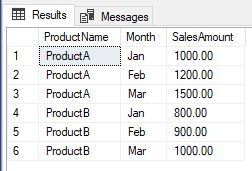

In [7]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image3.JPG")


In [ ]:

SELECT *
FROM (
    SELECT ProductName, Month, SalesAmount
    FROM SalesData
) AS SourceTable
PIVOT (
    SUM(SalesAmount)
    FOR Month IN ([Jan], [Feb], [Mar])
) AS PivotTable



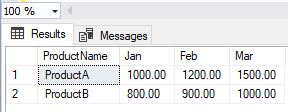

In [6]:

-- A pivot takes lots of rows and converts it into any/all necessary columns.
-- We pivot a data set to make it easier for a human to read, based on certain conditions, or constraints...

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image4.JPG")


In [ ]:

-- We can also easily unpivot a dataset, to convert a bunch of columns into a bunchof rows...

CREATE TABLE PivotedSalesData (
    ProductName NVARCHAR(50),
    Jan DECIMAL(10, 2),
    Feb DECIMAL(10, 2),
    Mar DECIMAL(10, 2)
);

INSERT INTO PivotedSalesData (ProductName, Jan, Feb, Mar)
VALUES
    ('ProductA', 1000, 1200, 1500),
    ('ProductB', 800, 900, 1000);


Select * From PivotedSalesData


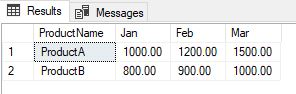

In [9]:

-- Several columns...

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image5.JPG")


In [ ]:

-- Becomes several rows...

SELECT ProductName, Month, SalesAmount
FROM (
    SELECT ProductName, Jan, Feb, Mar
    FROM PivotedSalesData
) AS SourceTable
UNPIVOT (
    SalesAmount FOR Month IN ([Jan], [Feb], [Mar])
) AS UnpivotedTable;


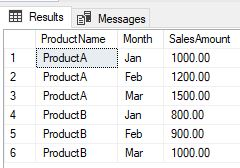

In [8]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image6.JPG")


In [ ]:

-- Here is a great way to parse a datetime feature and create some logic to define three conditions:
-- if 7AM to 11PM Monday to Friday, give me 5x16 (working days and awake hours)
-- if 7AM to 11PM Saturday to Sunday, give me 2x16 (weekends and awake hours)
-- if 11PM to 7AM ANY DAY, give me 7x8 (every day andsleeping hours)


IF OBJECT_ID('MyTable') IS NOT NULL  
   DROP TABLE MyTable;  
GO


CREATE TABLE MyTable (
    ID INT PRIMARY KEY,
    EventDateTime DATETIME,
    EventValue INT
);

-----------------------------------------------------------------------------------------------

DECLARE @StartDate DATETIME = '2022-01-01';
DECLARE @EndDate DATETIME = '2023-12-31';
DECLARE @IDCounter INT = 1;

WHILE @StartDate <= @EndDate
BEGIN
    INSERT INTO MyTable (ID, EventDateTime, EventValue)
    VALUES
        (@IDCounter, @StartDate, CAST((RAND() * 10) + 0.5 AS DECIMAL(5,2)));

    SET @IDCounter = @IDCounter + 1;
    SET @StartDate = DATEADD(HOUR, 1, @StartDate); -- Assuming hourly data
END

-----------------------------------------------------------------------------------------------

SELECT
    ID,
    EventDateTime,
    EventValue,
    CASE
        WHEN (DATEPART(dw, EventDateTime) BETWEEN 2 AND 6 AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN '5x16'
        WHEN (DATEPART(dw, EventDateTime) IN (1, 7) AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN '2x16'
        WHEN (DATEPART(HOUR, EventDateTime) >= 23 or (DATEPART(HOUR, EventDateTime) <=6)) THEN '7x8'
        ELSE '' -- Handle null case
    END AS TimeCategory
FROM MyTable


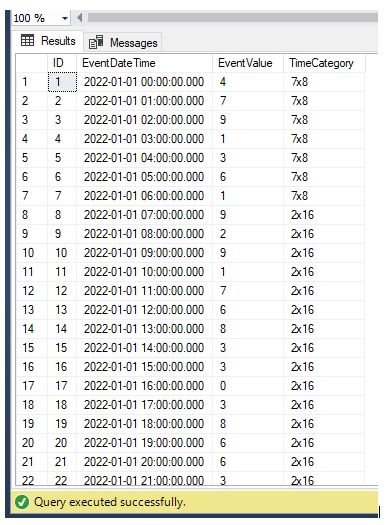

In [3]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


In [1]:

-- Here is a way to apply the same logic, but create new columns/features, instead of putting everything in the same column.

SELECT
    ID,
    EventDateTime,
    EventValue,
    AVG(CASE WHEN (DATEPART(dw, EventDateTime) BETWEEN 2 AND 6 AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN EventValue ELSE 0 END) AS [5x16],
    AVG(CASE WHEN (DATEPART(dw, EventDateTime) IN (1, 7) AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN EventValue ELSE 0 END) AS [2x16],
    AVG(CASE WHEN (DATEPART(HOUR, EventDateTime) >= 23 or (DATEPART(HOUR, EventDateTime) <=6)) THEN  EventValue ELSE 0 END) AS [7x8]
FROM MyTable
GROUP BY     ID,
    EventDateTime,
    EventValue


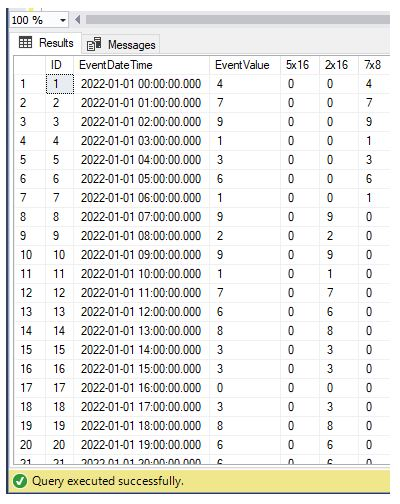

In [4]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")
